# Exploratory Analysis and Visualization

In [1]:
# Importing of dependencies required for analysis
import pandas as pd
import sklearn as skl
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
import requests
import urllib.parse
import datetime
import time
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt



In [2]:
# Read in table of data from PGADMIN or connected database

from sqlalchemy import create_engine
#import library psycopyg2
import psycopg2
#import library sqlio
import pandas.io.sql as sqlio

# Postgres username, password, and database name
POSTGRES_ADDRESS = 'db1-realestate-prediction.cc3utfionj0h.us-east-2.rds.amazonaws.com' ## INSERT YOUR DB ADDRESS
POSTGRES_PORT = '5432'
POSTGRES_USERNAME = 'realestate'
POSTGRES_PASSWORD = '12345678'
POSTGRES_DBNAME = 'postgres'

#create database connection variable 
conn = psycopg2.connect(user=POSTGRES_USERNAME, password=POSTGRES_PASSWORD, host=POSTGRES_ADDRESS, database=POSTGRES_DBNAME)

/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [3]:
#Viewing the BD from SQL

df_dbase = sqlio.read_sql_query('''SELECT * FROM public."REALESTATE";''', conn)
df_dbase

,municipality,community,list_price,sold_price,type,style,br,er,wr,fr,kitchen,gar_type,ac,heat,contract_date,mls_id,address,lat,lng
0,Toronto C00,Niagara,699999.0,780000.0,Att/Row/Townhouse,2-Storey,3.0,0.0,1.0,N,1.0,None,Central Air,Gas,2021-01-13,C5083064,"793 Adelaide St W, Toronto",43.643807,-79.409426
1,Toronto C01,University,799000.0,1225000.0,Semi-Detached,2-Storey,3.0,0.0,2.0,Y,2.0,None,None,Gas,2020-05-29,C4773721,"75 Major St, Toronto",43.659648,-79.403456
2,Toronto C01,University,799000.0,1203000.0,Semi-Detached,2-Storey,3.0,1.0,3.0,N,2.0,None,None,Gas,2020-11-05,C4979474,"81 Major St, Toronto",43.659777,-79.403505
3,Toronto C01,Niagara,899000.0,959000.0,Att/Row/Townhouse,2-Storey,3.0,0.0,2.0,Y,1.0,None,Central Air,Gas,2020-09-22,C4923168,"784 Adelaide St W, Toronto",43.644117,-79.409249
4,Toronto C01,Niagara,899000.0,1073000.0,Att/Row/Townhouse,2-Storey,2.0,0.0,2.0,N,1.0,None,Central Air,Gas,2020-11-10,C4985281,"16 Whitaker Ave, Toronto",43.643948,-79.406457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30713,Toronto W10,Thistletown-Beaumonde Heights,1299900.0,1300000.0,Detached,1 1/2 Storey,4.0,2.0,3.0,N,1.0,Attached,Central Air,Gas,2021-10-03,W5391840,"8 Wardlaw Cres, Toronto",43.739635,-79.565621
30714,Toronto W10,Thistletown-Beaumonde Heights,1349000.0,1365000.0,Detached,Backsplit,4.0,1.0,2.0,N,1.0,Attached,Central Air,Gas,2021-11-12,W5430335,"156 Thistle Down Blvd, Toronto",43.740987,-79.550545
30715,Toronto W10,West Humber-Clairville,1599900.0,1600000.0,Detached,2-Storey,4.0,0.0,4.0,Y,1.0,Attached,Central Air,Gas,2021-12-17,W5458498,"11 Woodlot Cres, Toronto",43.732902,-79.614069
30716,Toronto W10,Thistletown-Beaumonde Heights,1750000.0,1850000.0,Detached,Backsplit,5.0,0.0,4.0,Y,1.0,Attached,Central Air,Gas,2021-12-02,W5447590,"16 Forest Path Crt, Toronto",43.741928,-79.555623


In [4]:
#Detecting Nulls
df_dbase.isnull().sum()

municipality     0
community        0
list_price       0
sold_price       0
type             0
style            0
br               0
er               0
wr               0
fr               0
kitchen          0
gar_type         0
ac               0
heat             0
contract_date    0
mls_id           0
address          0
lat              0
lng              0
dtype: int64

In [5]:
#Detecting Data Types
df_dbase.dtypes

municipality      object
community         object
list_price       float64
sold_price       float64
type              object
style             object
br               float64
er               float64
wr               float64
fr                object
kitchen          float64
gar_type          object
ac                object
heat              object
contract_date     object
mls_id            object
address           object
lat              float64
lng              float64
dtype: object

In [6]:
#Printing DB
df_dbase

,municipality,community,list_price,sold_price,type,style,br,er,wr,fr,kitchen,gar_type,ac,heat,contract_date,mls_id,address,lat,lng
0,Toronto C00,Niagara,699999.0,780000.0,Att/Row/Townhouse,2-Storey,3.0,0.0,1.0,N,1.0,None,Central Air,Gas,2021-01-13,C5083064,"793 Adelaide St W, Toronto",43.643807,-79.409426
1,Toronto C01,University,799000.0,1225000.0,Semi-Detached,2-Storey,3.0,0.0,2.0,Y,2.0,None,None,Gas,2020-05-29,C4773721,"75 Major St, Toronto",43.659648,-79.403456
2,Toronto C01,University,799000.0,1203000.0,Semi-Detached,2-Storey,3.0,1.0,3.0,N,2.0,None,None,Gas,2020-11-05,C4979474,"81 Major St, Toronto",43.659777,-79.403505
3,Toronto C01,Niagara,899000.0,959000.0,Att/Row/Townhouse,2-Storey,3.0,0.0,2.0,Y,1.0,None,Central Air,Gas,2020-09-22,C4923168,"784 Adelaide St W, Toronto",43.644117,-79.409249
4,Toronto C01,Niagara,899000.0,1073000.0,Att/Row/Townhouse,2-Storey,2.0,0.0,2.0,N,1.0,None,Central Air,Gas,2020-11-10,C4985281,"16 Whitaker Ave, Toronto",43.643948,-79.406457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30713,Toronto W10,Thistletown-Beaumonde Heights,1299900.0,1300000.0,Detached,1 1/2 Storey,4.0,2.0,3.0,N,1.0,Attached,Central Air,Gas,2021-10-03,W5391840,"8 Wardlaw Cres, Toronto",43.739635,-79.565621
30714,Toronto W10,Thistletown-Beaumonde Heights,1349000.0,1365000.0,Detached,Backsplit,4.0,1.0,2.0,N,1.0,Attached,Central Air,Gas,2021-11-12,W5430335,"156 Thistle Down Blvd, Toronto",43.740987,-79.550545
30715,Toronto W10,West Humber-Clairville,1599900.0,1600000.0,Detached,2-Storey,4.0,0.0,4.0,Y,1.0,Attached,Central Air,Gas,2021-12-17,W5458498,"11 Woodlot Cres, Toronto",43.732902,-79.614069
30716,Toronto W10,Thistletown-Beaumonde Heights,1750000.0,1850000.0,Detached,Backsplit,5.0,0.0,4.0,Y,1.0,Attached,Central Air,Gas,2021-12-02,W5447590,"16 Forest Path Crt, Toronto",43.741928,-79.555623


In [7]:
# Visualisation code taken from https://github.com/mahsamir/CaseStudy-KerasRegression/blob/master/Kaggle-KerassRegression.ipynb
import seaborn as sns

/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


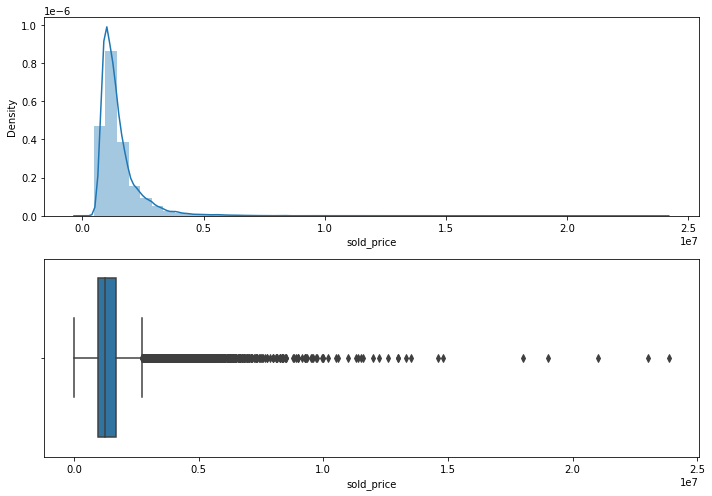

In [8]:
#visualizing house prices
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(df_dbase['sold_price'])
fig.add_subplot(2,1,2)
sns.boxplot(df_dbase['sold_price'])
plt.tight_layout()

/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/

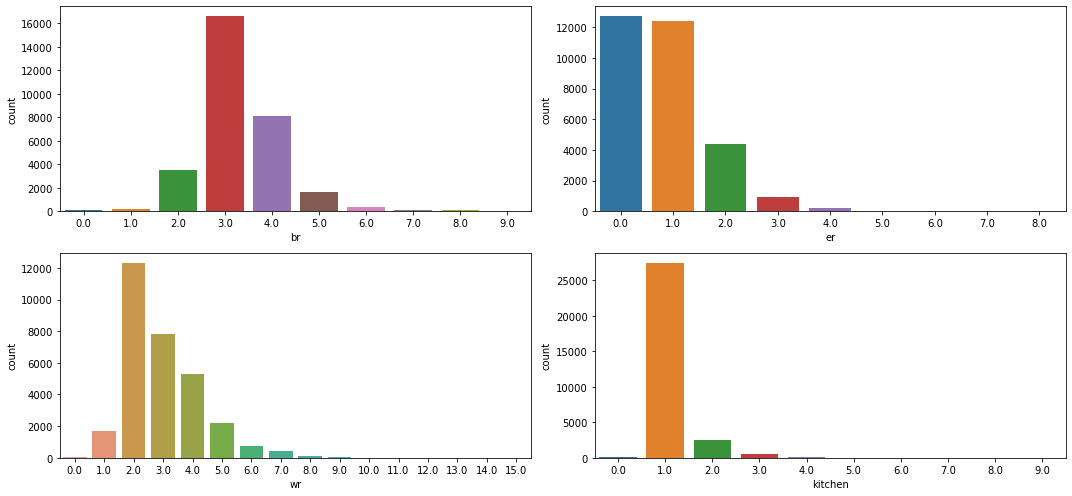

In [22]:
# plotting bedrooms, kitchens, extra rooms and wash rooms according to count of houses
fig = plt.figure(figsize=(15,7))
fig.add_subplot(2,2,1)
sns.countplot(df_dbase['br'])
fig.add_subplot(2,2,2)
sns.countplot(df_dbase['er'])
fig.add_subplot(2,2,3)
sns.countplot(df_dbase['wr'])
fig.add_subplot(2,2,4)
sns.countplot(df_dbase['kitchen'])
plt.tight_layout()

/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


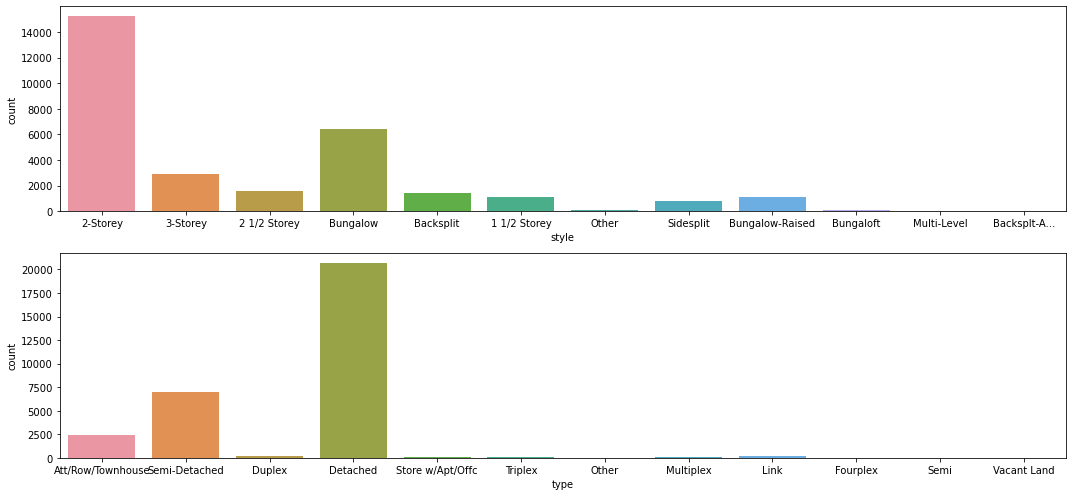

In [23]:
# Plotting counts of styles and types
fig = plt.figure(figsize=(15,7))
fig.add_subplot(2,1,1)
sns.countplot(df_dbase['style'])
fig.add_subplot(2,1,2)
sns.countplot(df_dbase['type'])
plt.tight_layout()

/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/

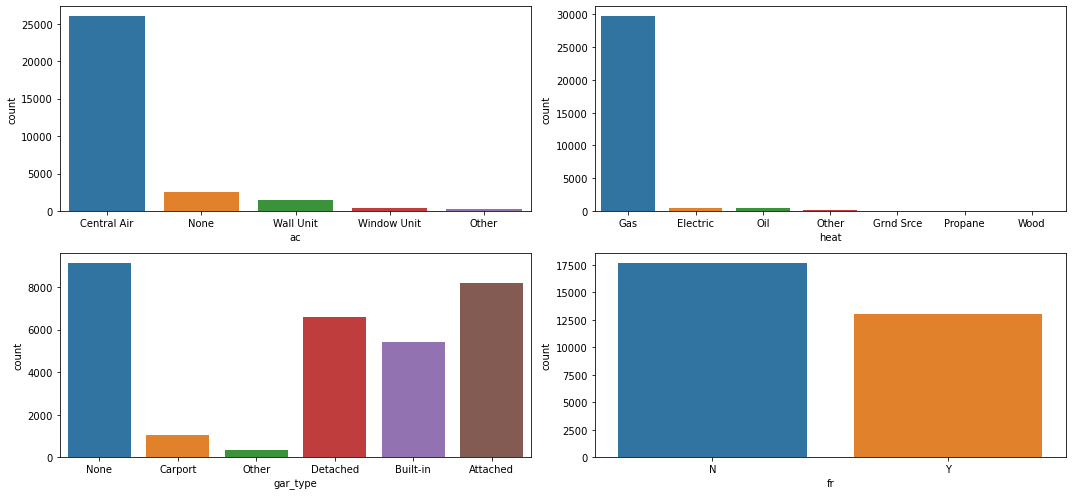

In [24]:
# Plotting counts ac, heat and garage type and if Familly room exists
fig = plt.figure(figsize=(15,7))
fig.add_subplot(2,2,1)
sns.countplot(df_dbase['ac'])
fig.add_subplot(2,2,2)
sns.countplot(df_dbase['heat'])
fig.add_subplot(2,2,3)
sns.countplot(df_dbase['gar_type'])
fig.add_subplot(2,2,4)
sns.countplot(df_dbase['fr'])
plt.tight_layout()

<AxesSubplot:title={'center':'Selling Price according to Contract Dates'}, xlabel='Contract Date', ylabel='Selling Price'>

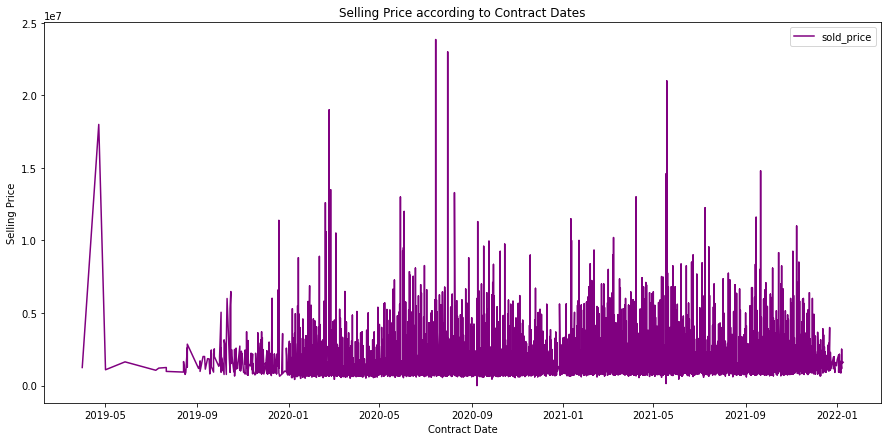

In [25]:
# Plotting price vs features
df_dbase.plot(x='contract_date', y ='sold_price', figsize =(15,7), title ='Selling Price according to Contract Dates', xlabel = 'Contract Date', ylabel ='Selling Price', color = 'purple')

In [26]:
# average Prices according to features Bedroom
df_dbase.groupby(["br"]).mean()["sold_price"]

br
0.0    1.870556e+06
1.0    9.992116e+05
2.0    1.100633e+06
3.0    1.279634e+06
4.0    1.859942e+06
5.0    2.516545e+06
6.0    2.555058e+06
7.0    2.428115e+06
8.0    2.572514e+06
9.0    2.684413e+06
Name: sold_price, dtype: float64

In [27]:
# average Prices according to features Washroom
df_dbase.groupby(["wr"]).mean()["sold_price"]

wr
0.0     2.033410e+06
1.0     1.043299e+06
2.0     1.163934e+06
3.0     1.363856e+06
4.0     1.733080e+06
5.0     2.450635e+06
6.0     2.948865e+06
7.0     3.623988e+06
8.0     4.317660e+06
9.0     6.422211e+06
10.0    4.501611e+06
11.0    5.670101e+06
12.0    5.263333e+06
13.0    1.290000e+07
14.0    6.115000e+06
15.0    7.479500e+06
Name: sold_price, dtype: float64

In [28]:
# average Prices according to features Entertainment room
df_dbase.groupby(["er"]).mean()["sold_price"]

er
0.0    1.396732e+06
1.0    1.624490e+06
2.0    1.476245e+06
3.0    1.374550e+06
4.0    1.618508e+06
5.0    1.756574e+06
6.0    2.854545e+06
7.0    1.552825e+06
8.0    2.905000e+06
Name: sold_price, dtype: float64

In [29]:
# average Prices according to features Familly Room
df_dbase.groupby(["fr"]).mean()["sold_price"]

fr
N    1.250393e+06
Y    1.844213e+06
Name: sold_price, dtype: float64

In [30]:
# average Prices according to features Kitchen
df_dbase.groupby(["kitchen"]).mean()["sold_price"]

kitchen
0.0    1.922108e+06
1.0    1.500228e+06
2.0    1.403748e+06
3.0    1.712356e+06
4.0    2.211764e+06
5.0    2.563227e+06
6.0    2.666288e+06
7.0    2.205917e+06
8.0    3.371656e+06
9.0    3.046250e+06
Name: sold_price, dtype: float64

In [31]:
# average Prices according to features Garage
df_dbase.groupby(["gar_type"]).mean()["sold_price"]

gar_type
Attached    1.470819e+06
Built-in    1.910682e+06
Carport     1.183159e+06
Detached    1.474331e+06
None        1.347291e+06
Other       1.404705e+06
Name: sold_price, dtype: float64

In [32]:
# average Prices according to features Heating
df_dbase.groupby(["heat"]).mean()["sold_price"]

heat
Electric     1.334269e+06
Gas          1.505237e+06
Grnd Srce    3.177992e+06
Oil          1.275490e+06
Other        1.630947e+06
Propane      1.200000e+06
Wood         1.296728e+06
Name: sold_price, dtype: float64

In [33]:
# average Prices according to features AC
df_dbase.groupby(["ac"]).mean()["sold_price"]

ac
Central Air    1.513155e+06
None           1.286457e+06
Other          1.807320e+06
Wall Unit      1.669040e+06
Window Unit    1.321409e+06
Name: sold_price, dtype: float64

In [34]:
# average Prices according to features By residence Type
df_dbase.groupby(["type"]).mean()["sold_price"]

type
Att/Row/Townhouse    1.172969e+06
Detached             1.621732e+06
Duplex               1.607485e+06
Fourplex             2.050352e+06
Link                 9.876958e+05
Multiplex            2.772008e+06
Other                2.176091e+06
Semi                 1.450000e+06
Semi-Detached        1.251453e+06
Store w/Apt/Offc     1.432706e+06
Triplex              1.628706e+06
Vacant Land          1.049995e+06
Name: sold_price, dtype: float64

In [35]:
# average Prices according to features By residence Style
df_dbase.groupby(["style"]).mean()["sold_price"]

style
1 1/2 Storey       1.201245e+06
2 1/2 Storey       1.986681e+06
2-Storey           1.629456e+06
3-Storey           1.854262e+06
Backsplit          1.166243e+06
Backsplt-A...      1.205000e+06
Bungaloft          1.220307e+06
Bungalow           1.119971e+06
Bungalow-Raised    1.130534e+06
Multi-Level        2.030000e+06
Other              1.786648e+06
Sidesplit          1.402856e+06
Name: sold_price, dtype: float64

In [36]:
# average Prices according to features by Area "Municipality"
df_dbase.groupby(["municipality"]).mean()["sold_price"]

municipality
Toronto C00    7.800000e+05
Toronto C01    1.701418e+06
Toronto C02    2.422918e+06
Toronto C03    2.031312e+06
Toronto C04    2.476018e+06
Toronto C06    1.599797e+06
Toronto C07    1.762755e+06
Toronto C08    1.566788e+06
Toronto C09    3.663374e+06
Toronto C10    1.899077e+06
Toronto C11    2.180700e+06
Toronto C12    3.986045e+06
Toronto C13    1.706585e+06
Toronto C14    2.181034e+06
Toronto C15    1.541356e+06
Toronto E01    1.382839e+06
Toronto E02    1.503525e+06
Toronto E03    1.271646e+06
Toronto E04    1.011135e+06
Toronto E05    1.161252e+06
Toronto E06    1.160547e+06
Toronto E07    1.086651e+06
Toronto E08    1.219745e+06
Toronto E09    9.779303e+05
Toronto E10    1.101861e+06
Toronto E11    9.343084e+05
Toronto W01    1.850098e+06
Toronto W02    1.456323e+06
Toronto W03    1.020027e+06
Toronto W04    1.108075e+06
Toronto W05    9.906750e+05
Toronto W06    1.291410e+06
Toronto W07    1.615211e+06
Toronto W08    1.722662e+06
Toronto W09    1.243138e+06
Toronto

In [37]:
# average Prices according to features Community
df_dbase.groupby(["community"]).mean()["sold_price"]

community
Agincourt North                 1.053070e+06
Agincourt South-Malvern West    1.173628e+06
Alderwood                       1.263316e+06
Annex                           2.516080e+06
Banbury-Don Mills               2.387883e+06
                                    ...     
Wychwood                        1.597694e+06
Yonge-Eglinton                  2.127079e+06
Yonge-St. Clair                 2.845841e+06
York University Heights         9.948220e+05
Yorkdale-Glen Park              1.461823e+06
Name: sold_price, Length: 142, dtype: float64

In [38]:
# average Prices according to features, 
#X1 clean lon, lat, and compare by type only
#X2 clean lon, lat, and compare by style only

x1= df_dbase.groupby(["type"]).mean()
x2 = df_dbase.groupby(["style"]).mean()
x1.drop(['lat', 'lng'], inplace=True, axis =1)
x2.drop(['lat', 'lng'], inplace=True, axis =1)

In [39]:
#Print X1
x1

,list_price,sold_price,br,er,wr,kitchen
type,,,,,,
Att/Row/Townhouse,1.094489e+06,1.172969e+06,3.058679,0.456299,2.884284,1.089865
Detached,1.560759e+06,1.621732e+06,3.343519,0.913637,3.087762,1.096548
Duplex,1.566668e+06,1.607485e+06,4.095238,0.878307,3.285714,2.095238
Fourplex,2.009173e+06,2.050352e+06,6.384615,0.807692,4.576923,3.923077
Link,9.226016e+05,9.876958e+05,3.337662,0.883117,3.136364,1.038961
Multiplex,2.859444e+06,2.772008e+06,6.523077,2.261538,6.292308,4.876923
Other,2.145782e+06,2.176091e+06,3.636364,0.727273,3.363636,1.818182
Semi,1.488000e+06,1.450000e+06,3.000000,0.000000,3.000000,1.000000
Semi-Detached,1.140721e+06,1.251453e+06,3.190866,0.626598,2.560103,1.163579


In [40]:
#Print X2
x2

,list_price,sold_price,br,er,wr,kitchen
style,,,,,,
1 1/2 Storey,1.130132e+06,1.201245e+06,2.936697,0.691743,2.296330,1.064220
2 1/2 Storey,1.893841e+06,1.986681e+06,4.049305,0.662453,3.300253,1.445638
2-Storey,1.557113e+06,1.629456e+06,3.409333,0.704535,3.262191,1.114852
3-Storey,1.802330e+06,1.854262e+06,3.727711,0.617212,3.731842,1.245095
Backsplit,1.099051e+06,1.166243e+06,3.653515,0.729555,2.714491,1.121951
Backsplt-A...,1.250000e+06,1.205000e+06,3.000000,2.000000,3.000000,2.000000
Bungaloft,1.141496e+06,1.220307e+06,2.750000,1.166667,2.450000,1.133333
Bungalow,1.038265e+06,1.119971e+06,2.712601,1.199565,2.132526,1.082868
Bungalow-Raised,1.059974e+06,1.130534e+06,3.020591,1.153089,2.342883,1.126231


In [41]:
# check correlation
df_dbase.corr()['sold_price'].sort_values(ascending=False)

sold_price    1.000000
list_price    0.984773
wr            0.598249
br            0.395104
er            0.049102
kitchen       0.048520
lng           0.006346
lat          -0.005482
Name: sold_price, dtype: float64

<AxesSubplot:xlabel='sold_price', ylabel='kitchen'>

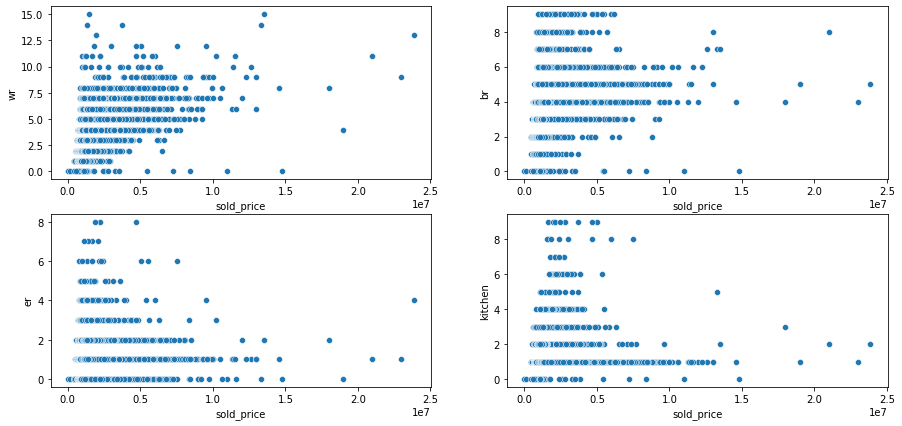

In [42]:
## numeric features with higher correlation
fig =plt.figure(figsize=(15,7))
fig.add_subplot(2,2,1)
sns.scatterplot(x='sold_price',y='wr',data=df_dbase)
fig.add_subplot(2,2,2)
sns.scatterplot(x='sold_price',y='br',data=df_dbase)
fig.add_subplot(2,2,3)
sns.scatterplot(x='sold_price',y='er',data=df_dbase)
fig.add_subplot(2,2,4)
sns.scatterplot(x='sold_price',y='kitchen',data=df_dbase)

In [43]:
#Checking and describing lat
df_dbase['lat'].describe()

count    30718.000000
mean        43.710383
std          0.506471
min        -37.817468
25%         43.672097
50%         43.702479
75%         43.753068
max         64.630916
Name: lat, dtype: float64

In [44]:
#Checking and describing lng
df_dbase['lng'].describe()

count    30718.000000
mean       -79.358470
std          1.848752
min        -80.600331
25%        -79.466836
50%        -79.398206
75%        -79.307248
max        144.951680
Name: lng, dtype: float64